Epoch 1/5
938/938 [==============================] - 28s 29ms/step - loss: 0.4858 - accuracy: 0.8257 - val_loss: 0.3637 - val_accuracy: 0.8689
Epoch 2/5
938/938 [==============================] - 27s 29ms/step - loss: 0.3215 - accuracy: 0.8834 - val_loss: 0.3255 - val_accuracy: 0.8848
Epoch 3/5
938/938 [==============================] - 27s 28ms/step - loss: 0.2723 - accuracy: 0.9014 - val_loss: 0.2897 - val_accuracy: 0.8956
Epoch 4/5
938/938 [==============================] - 27s 28ms/step - loss: 0.2420 - accuracy: 0.9110 - val_loss: 0.2638 - val_accuracy: 0.9056
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.2525 - accuracy: 0.9095
Test Accuracy: 0.9095


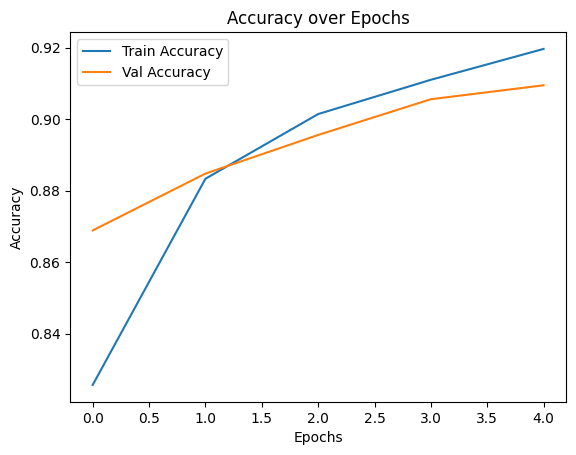

313/313 [==============================] - 2s 5ms/step


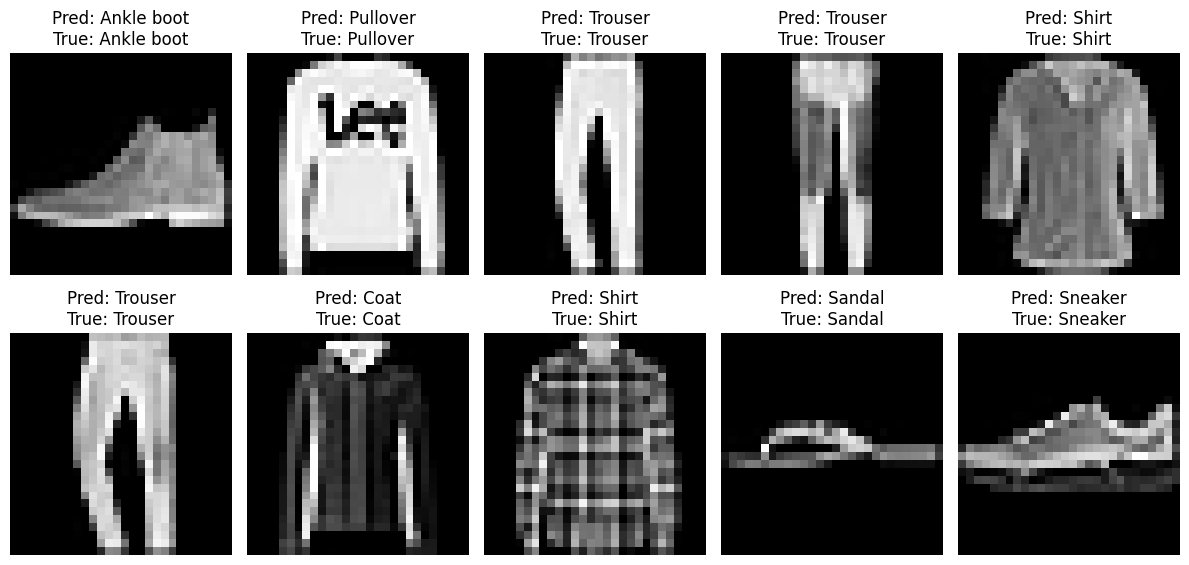

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# ✅ Load and preprocess the MNIST Fashion dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape the data to add an extra dimension for the color channel (Grayscale image has 1 channel)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical format (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# ✅ Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # First Conv Layer
    MaxPooling2D(pool_size=(2, 2)),  # Max Pooling Layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),  # Second Conv Layer
    MaxPooling2D(pool_size=(2, 2)),  # Max Pooling Layer
    Flatten(),  # Flatten the 2D outputs to 1D
    Dense(128, activation='relu'),  # Fully connected hidden layer
    Dense(10, activation='softmax')  # Output layer (10 classes)
])

# ✅ Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# ✅ Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# ✅ Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# ✅ Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
import numpy as np

# ✅ Class names for better readability
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# ✅ Predict classes for the test set
predictions = model.predict(x_test)

# ✅ Convert prediction probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# ✅ Visualize the first 10 predictions
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {class_names[predicted_labels[i]]}\nTrue: {class_names[true_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
